In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.linear_model import Lasso
from sklearn.cross_validation import LeaveOneOut, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
df = pd.read_csv("data/combined.csv")

In [19]:
"""
Run LOO cross-validation using a list of features for the regression.
"""
def predict_loo(x_col_names, df, model):    
    loo = LeaveOneOut(len(df))
    scores = []
    n_features = len(x_col_names)
    for train, test in loo:
        x_train = df.iloc[train][x_col_names].values.reshape(-1, n_features)
        y_train = df.iloc[train]["murder_rate"].values.reshape(-1, 1)
        model.fit(x_train, y_train)        
        x_test = df.iloc[test][x_col_names].values.reshape(-1, n_features)     
        est = model.predict(x_test)
        scores.extend(est)        
    return scores

In [20]:
"""
Run kfold cross-validation using a list of features for the regression.
"""
def predict_kfold(x_col_names, df, model, n_folds=10):
    predictions = []
    kf = KFold(len(df), n_folds)
    n_features = len(x_col_names)
    for train, test in kf:
        x_train = df.iloc[train][x_col_names].values.reshape(-1, n_features)
        y_train = df.iloc[train]["murder_rate"].values.reshape(-1, 1)        
        model.fit(x_train, y_train)
        x_test = df.iloc[test][x_col_names].values.reshape(-1, n_features)
        est = model.predict(x_test)
        predictions.extend(est)           
    return predictions

In [21]:
"""
Compute residuals between lists of truth and predicted values.
"""
def residuals(truth, predicted):
    res = []
    for t,r in zip(truth, predicted):
        res.append(t - r)
    return res

In [22]:
# model for testing
model = make_pipeline(PolynomialFeatures(4), Lasso(alpha=0.2, max_iter=1000))

#model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=0.2))

# this is ground truth values
truth = df["murder_rate"].values

<h3>Predicted Murder Rate by Percentage Graduate HS</h3>

<h4>Leave One Out</h4>

In [23]:
# run LOO cross-validation using test model
predicted = predict_loo(["no_high_school"], df, model)            

# compute residuals
res = residuals(truth, predicted)

In [24]:
print truth
print predicted

mse = mean_squared_error(truth, predicted)
print "mean squared error", mse

mae = mean_absolute_error(truth, predicted)
print "mean absolute error", mae

[ 4.2  4.4  5.5  4.5  4.9  2.3  3.7  5.3  5.   5.3  1.8  1.3  3.5  3.1  1.2
  3.5  4.5  9.6  1.8  7.3  3.2  5.6  1.7  5.6  7.   2.1  2.8  5.9  1.   4.1
  5.7  4.4  4.7  1.3  4.   5.   2.   5.1  2.8  6.1  1.7  5.6  5.   1.9  1.1
  4.6  2.2  3.   2.7  1.4]
[5.5433058207533943, 1.4437790801243442, 5.2713810504360961, 5.5347479348733515, 5.1563769384860763, 2.9693041379705916, 3.3466043792925326, 3.968578367537555, 4.9537850182103247, 5.3498413498906956, 2.3132783154658276, 3.5395482359867585, 4.5538081728878055, 4.4732355460691027, 2.2829604048238843, 2.6809898937256795, 5.4843417791021025, 5.1876921054559917, 2.436995499467729, 3.4633397402124748, 3.1225726061066812, 3.6867725405854896, 1.6218452527631966, 4.8612343426934315, 4.2038025678335469, 2.0442089050366556, 2.6442101788991228, 5.3170707418820999, 1.8108028382460235, 4.0138581481670528, 5.4616033815171958, 5.1933034975322077, 5.2902359903238168, 2.5202230311542957, 3.9084744741935298, 4.8362983532406805, 3.0999901024033529, 3.7037

mean squared error 3.13237121793
mean absolute error 1.41616166071


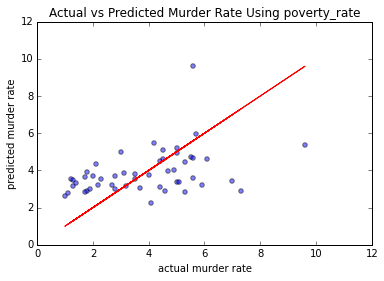

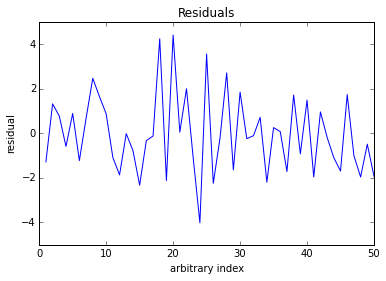

mean squared error 2.90129022059
mean absolute error 1.29042537788


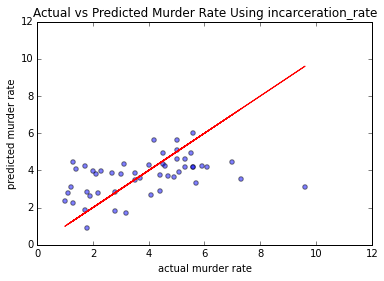

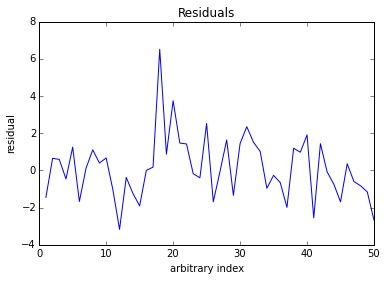

mean squared error 1.88734722233
mean absolute error 0.949527796605


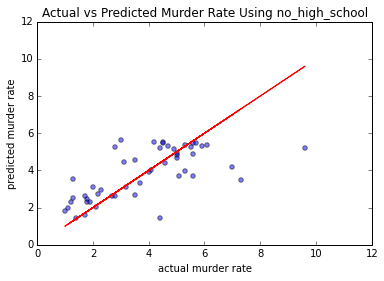

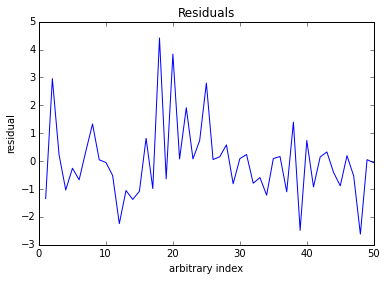

In [33]:
def run_loo(x_col_name):
    # run LOO cross-validation using test model
    predicted = predict_loo([x_col_name], df, model)            

    # compute residuals
    res = residuals(truth, predicted)
    
    mse = mean_squared_error(truth, predicted)
    print "mean squared error", mse

    mae = mean_absolute_error(truth, predicted)
    print "mean absolute error", mae
    
    # plot actual vs predicted murder rate
    plt.scatter(truth, predicted, alpha=0.5)
    plt.xlabel("actual murder rate")
    plt.ylabel("predicted murder rate")
    plt.title("Actual vs Predicted Murder Rate Using " + x_col_name)
    plt.plot(truth, truth, color="red")
    plt.show()
    
    # plot residuals
    plt.plot(range(1,51), res)
    plt.title("Residuals")
    plt.xlabel("arbitrary index")
    plt.ylabel("residual")
    plt.show()
    
run_loo("poverty_rate")
run_loo("incarceration_rate")
run_loo("no_high_school")

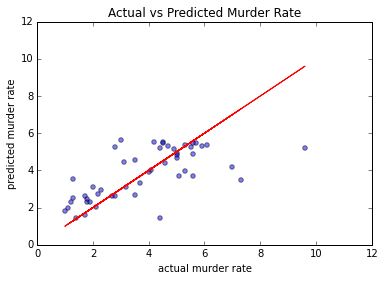

In [25]:
# plot actual vs predicted murder rate
plt.scatter(truth, predicted, alpha=0.5)
plt.xlabel("actual murder rate")
plt.ylabel("predicted murder rate")
plt.title("Actual vs Predicted Murder Rate")
plt.plot(truth, truth, color="red")
plt.show()

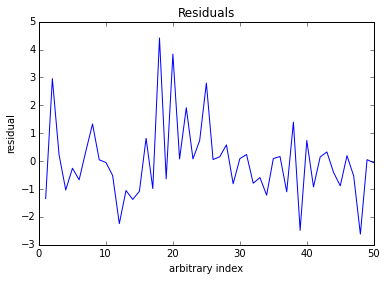

In [26]:
# plot residuals
plt.plot(range(1,51), res)
plt.title("Residuals")
plt.xlabel("arbitrary index")
plt.ylabel("residual")
plt.show()

<h4>K-Fold</h4>

In [27]:
# run k-fold cross-validation using test model
predicted = predict_kfold(["no_high_school"], df, model)            

# compute residuals
res = residuals(truth, predicted)

In [28]:
mse = mean_squared_error(truth, predicted)
print "mean squared error", mse

mae = mean_absolute_error(truth, predicted)
print "mean absolute error", mae

mean squared error 1.93131328262
mean absolute error 0.957437006216


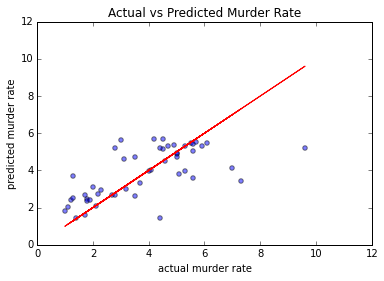

In [29]:
# plot actual vs predicted murder rate
plt.scatter(truth, predicted, alpha=0.5)
plt.xlabel("actual murder rate")
plt.ylabel("predicted murder rate")
plt.title("Actual vs Predicted Murder Rate")
plt.plot(truth, truth, color="red")
plt.show()

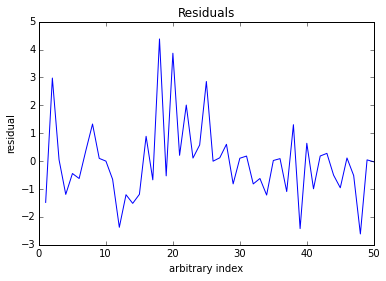

In [30]:
# plot residuals
plt.plot(range(1,51), res)
plt.title("Residuals")
plt.xlabel("arbitrary index")
plt.ylabel("residual")
plt.show()

<h4>Multiple Features</h4>

In [31]:
# run k-fold cross-validation using test model
predicted = predict_kfold(["no_high_school", "poverty_rate"], df, model)            

# compute residuals
res = residuals(truth, predicted)

In [32]:
mse = mean_squared_error(truth, predicted)
print "mean squared error", mse

mae = mean_absolute_error(truth, predicted)
print "mean absolute error", mae

mean squared error 2.26911445823
mean absolute error 1.08529196497
